## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[["Mouse ID", "Timepoint"]].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicateRows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
indexNames = combined_data[combined_data['Mouse ID'] == 'g989'].index
 
# Delete these row indexes from dataFrame
clean_combined_data = combined_data.drop(indexNames)

clean_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_combined_data["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_group = clean_combined_data.groupby("Drug Regimen")

drug_mean = drug_group["Tumor Volume (mm3)"].mean()
drug_median = drug_group["Tumor Volume (mm3)"].median()
drug_variance = drug_group["Tumor Volume (mm3)"].var()
drug_stddev = drug_group["Tumor Volume (mm3)"].std()
drug_sem = drug_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
drug_calc_df = pd.DataFrame({
    "Tumor Vol Mean": drug_mean,
    "Tumor Vol Median": drug_median,
    "Tumor Vol Variance": drug_variance,
    "Tumor Vol Standard Dev": drug_stddev,
    "Tumor Vol SEM": drug_sem
})

# Format numbers
drug_calc_df["Tumor Vol Mean"] = drug_calc_df["Tumor Vol Mean"].map("{:,.2f}".format)
drug_calc_df["Tumor Vol Median"] = drug_calc_df["Tumor Vol Median"].map("{:,.2f}".format)
drug_calc_df["Tumor Vol Variance"] = drug_calc_df["Tumor Vol Variance"].map("{:,.2f}".format)
drug_calc_df["Tumor Vol Standard Dev"] = drug_calc_df["Tumor Vol Standard Dev"].map("{:,.2f}".format)
drug_calc_df["Tumor Vol SEM"] = drug_calc_df["Tumor Vol SEM"].map("{:,.4f}".format)

# Display summary table
drug_calc_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Standard Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.3293
Ceftamin,52.59,51.78,39.29,6.27,0.4698
Infubinol,52.88,51.82,43.13,6.57,0.4922
Ketapril,55.24,53.70,68.55,8.28,0.6039
Naftisol,54.33,52.51,66.17,8.13,0.5965
Placebo,54.03,52.29,61.17,7.82,0.5813
Propriva,52.32,50.45,43.85,6.62,0.5443
Ramicane,40.22,40.67,23.49,4.85,0.3210
Stelasyn,54.23,52.43,59.45,7.71,0.5731


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

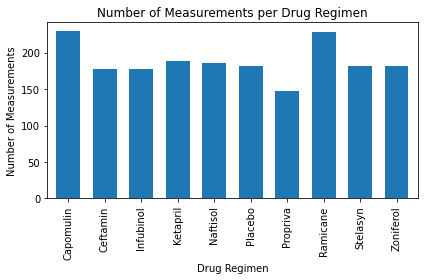

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group["Tumor Volume (mm3)"].count().plot(kind = "bar", title = "Number of Measurements per Drug Regimen", width = .65)

plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()

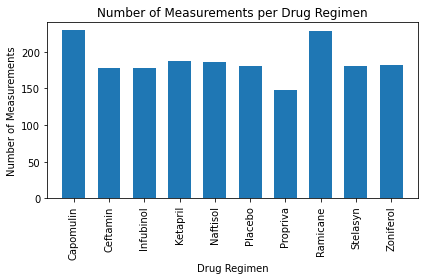

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_group_df = pd.DataFrame(drug_group["Tumor Volume (mm3)"].count())
drug_group_df = drug_group_df.reset_index()

drugs = drug_group_df["Drug Regimen"]
measurements = drug_group_df["Tumor Volume (mm3)"]

x_axis = len(drugs)
plt.title("Number of Measurements per Drug Regimen", loc='center')
plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(measurements) + 10)
plt.xticks(rotation = 90)
plt.bar(drugs, measurements, width=.65, align="center")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")

plt.tight_layout()
plt.show()

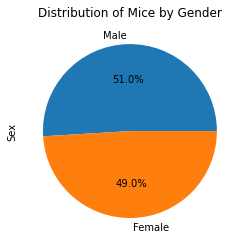

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_combined_data["Sex"].value_counts().plot(kind = "pie", title = "Distribution of Mice by Gender", autopct="%1.1f%%")

plt.show()

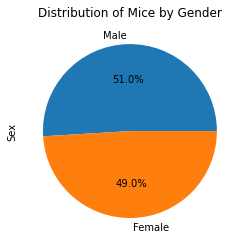

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = clean_combined_data["Sex"].value_counts()
categories = clean_combined_data["Sex"].unique()

plt.pie(values, labels=categories, autopct="%1.1f%%")
plt.title("Distribution of Mice by Gender")
plt.ylabel("Sex")


plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_id_group = clean_combined_data.groupby(["Mouse ID", "Drug Regimen"], as_index=False)
mouse_id_group = pd.DataFrame(mouse_id_group["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_vol_df = mouse_id_group.merge(clean_combined_data)

# Get indices for which column Drug Regimen is not the four drugs we want to study
index_names = final_vol_df[(final_vol_df['Drug Regimen'] != "Capomulin") & (final_vol_df["Drug Regimen"] != "Ramicane") & 
                           (final_vol_df["Drug Regimen"] != "Infubinol") & (final_vol_df["Drug Regimen"] != "Ceftamin")].index 
  
# Drop these row indices
final_vol_df.drop(index_names, inplace = True)

# Display dataframe
final_vol_df.head(10)

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
3,a275,Ceftamin,45,Female,20,28,62.999356,3
6,a411,Ramicane,45,Male,3,22,38.407618,1
7,a444,Ramicane,45,Female,10,25,43.047543,0
10,a520,Ramicane,45,Male,13,21,38.810366,1
11,a577,Infubinol,30,Female,6,25,57.031862,2
12,a644,Ramicane,45,Female,7,17,32.978522,1
13,a685,Infubinol,45,Male,8,30,66.083066,3
19,b128,Capomulin,45,Female,9,22,38.982878,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

drug_vol_df = final_vol_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
drug_vol_df.values.tolist()
drug_vol_list = drug_vol_df.to_numpy().tolist()

# Create empty list to fill with tumor vol data (for plotting)
capo_tumor_vol_data = []
ram_tumor_vol_data = []
inf_tumor_vol_data = []
cef_tumor_vol_data = []

# Calculate the IQR 
q3 = final_vol_df["Tumor Volume (mm3)"].quantile(q=.75)
q1 = final_vol_df["Tumor Volume (mm3)"].quantile(q=.25)
iqr = q3 - q1

print(f"The lower quartile of tumor volume is: {q1}")
print(f"The upper quartile of tumor volume is: {q3}")
print(f"The interquartile range of tumor volume is: {iqr}")

# Use the Interquartile Rule to find outliers
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)

print(f"Upper bound is {upper_bound}")
print(f"Lower bound is {lower_bound}")

# Locate the rows which contain mice on each drug and get the tumor volumes # add subset 
drugs, vol = zip(*drug_vol_list)

for index, drug in enumerate(drugs):
    if drug == "Capomulin":
        capo_tumor_vol_data.append(vol[index])
    elif drug == "Ramicane":
        ram_tumor_vol_data.append(vol[index])
    elif drug == "Infubinol":
        inf_tumor_vol_data.append(vol[index])
    elif drug == "Ceftamin":
        cef_tumor_vol_data.append(vol[index])

# Determine outliers using upper and lower bounds
# outlier_vol_capo = final_vol_df.loc[(final_vol_df['Tumor Volume (mm3)'] < lower_bound) | (final_vol_df['Tumor Volume (mm3)'] > upper_bound)]
# outlier_vol_capo

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
Upper bound is 94.04403868375002
Lower bound is 3.0739668737499812


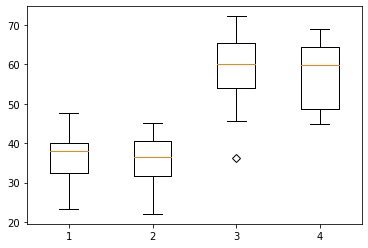

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# using Matplotlib
drug_boxplot = plt.boxplot([capo_tumor_vol_data, ram_tumor_vol_data, inf_tumor_vol_data, cef_tumor_vol_data])
plt.title = "Final Tumor Volume for Mice Treated with \n Capomulin, Ramicane, Infubinol and Ceftamin"
plt.setp(drug_boxplot['fliers'], color='red', marker='D')
plt.labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


plt.show()

## Line and Scatter Plots

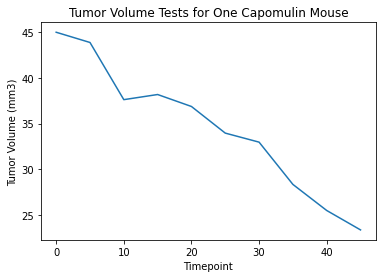

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Drop all mice but the one whose data we want to plot
indexNames2 = clean_combined_data[clean_combined_data['Mouse ID'] != "s185"].index 
vol_weight_df = clean_combined_data.drop(indexNames2)
vol_weight_df = vol_weight_df.set_index("Timepoint")

# Create line graph
plt.ylabel('Tumor Volume (mm3)')
vol_weight_df["Tumor Volume (mm3)"].plot.line(title="Tumor Volume Tests for One Capomulin Mouse")

# Display output
plt.show()

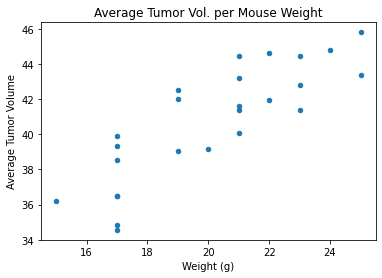

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Drop all drugs but Capomulin from data
indexNames3 = clean_combined_data[clean_combined_data["Drug Regimen"] != "Capomulin"].index
weight_avgvol = clean_combined_data.drop(indexNames3)
weight_avgvol = weight_avgvol.groupby(["Mouse ID"]).mean()

# Add column for average tumor volume to dataframe
weight_avgvol = weight_avgvol.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume"})

weight_avgvol.plot.scatter(x = "Weight (g)", y = "Average Tumor Volume", title = "Average Tumor Vol. per Mouse Weight")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


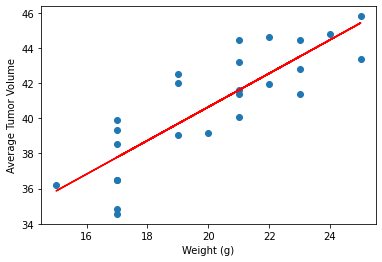

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = weight_avgvol["Weight (g)"]
avg_volume = weight_avgvol["Average Tumor Volume"]

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouse_weight, avg_volume)[0],2)}")

# Perform linear regression on mouse weight versus average tumor volume
vol_slope, vol_int, vol_r, vol_p, vol_std_err = st.linregress(mouse_weight, avg_volume)

# Create equation of regression line
vol_fit = vol_slope * mouse_weight + vol_int

# Plot regression line on scatter plot
plt.scatter(mouse_weight, avg_volume)
plt.plot(mouse_weight,vol_fit, "-", color = "red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

# Three Observations